# Energy Consumption Analysis

## Abstract
This project confronts the conflict of energy use and production on a global scale to provide predictive models on the future trends of energy worldwide and categorical classfication on the current global energy trends. Low-carbon-share energy, renewable energy, energy from fossil fuels, and primary energy sources are the focal points of the predictive modeling to gauge the future of sustainable energy consuptionand production. While we utilize classification modeling to determine the influence of energy consumption on country classification. The country for which we decided to focus on for prediction is the United States due to both the progressive and traditional energy sources utilized annually. We collected data from [Our World in Data](https://ourworldindata.org/energy/country/united-states) which provided us with both quantitative and qualitative data from global entities on the past and current energy trends.

Information gathered from [Our World in Data](https://ourworldindata.org/energy/country/united-states)

- Energy consumption per country
- Energy consumption yearly change
- Energy consumption by source
- Energy consumption from fossil fuels
- Energy consumption from low carbon sources
- Energy consumption from renewable energy sources
- Electricity generation

We can determine that the most influential features in determining predictive trends for United States energy consumption are low carbon energy sources and fossil fuels, with minimal feature importance of less than 10% being controlled by renewable energy. We also conlcuded energy consumption has little to no influence over the class and stage of which a country resides.

## Introduction

The future of energy is inconclusive yet extremely influential in societal and sustainability aspects. We can see a global trend of increased pressure for utilization of nuclear energy, natural gas, and hydroelectric power, as well as the transition to electric vehicles, efficient lighting, and frugal heating and air conditioning. However, the main sources of energy in todays society continue to be fossil fuels in the form of oil and coal. According to the United Nations the largest contributer to climate change is the use of fossil fuels due to their prodution of greenhouse gasses. The prediction of future energy trends can allow us to identify patterns and determine future risks regarding continued use non-renewable energy resources. Not only did we test for energy trends, but we also attempted to draw a correlation between idividual countries energy use and their economic class. 

In order to do this we used multiple tables scraped from [Our World in Data](https://ourworldindata.org/energy/country/united-states) to build machine learning algorithms in efforts to draw distinct conclusions based on qualitative and quantitative data.

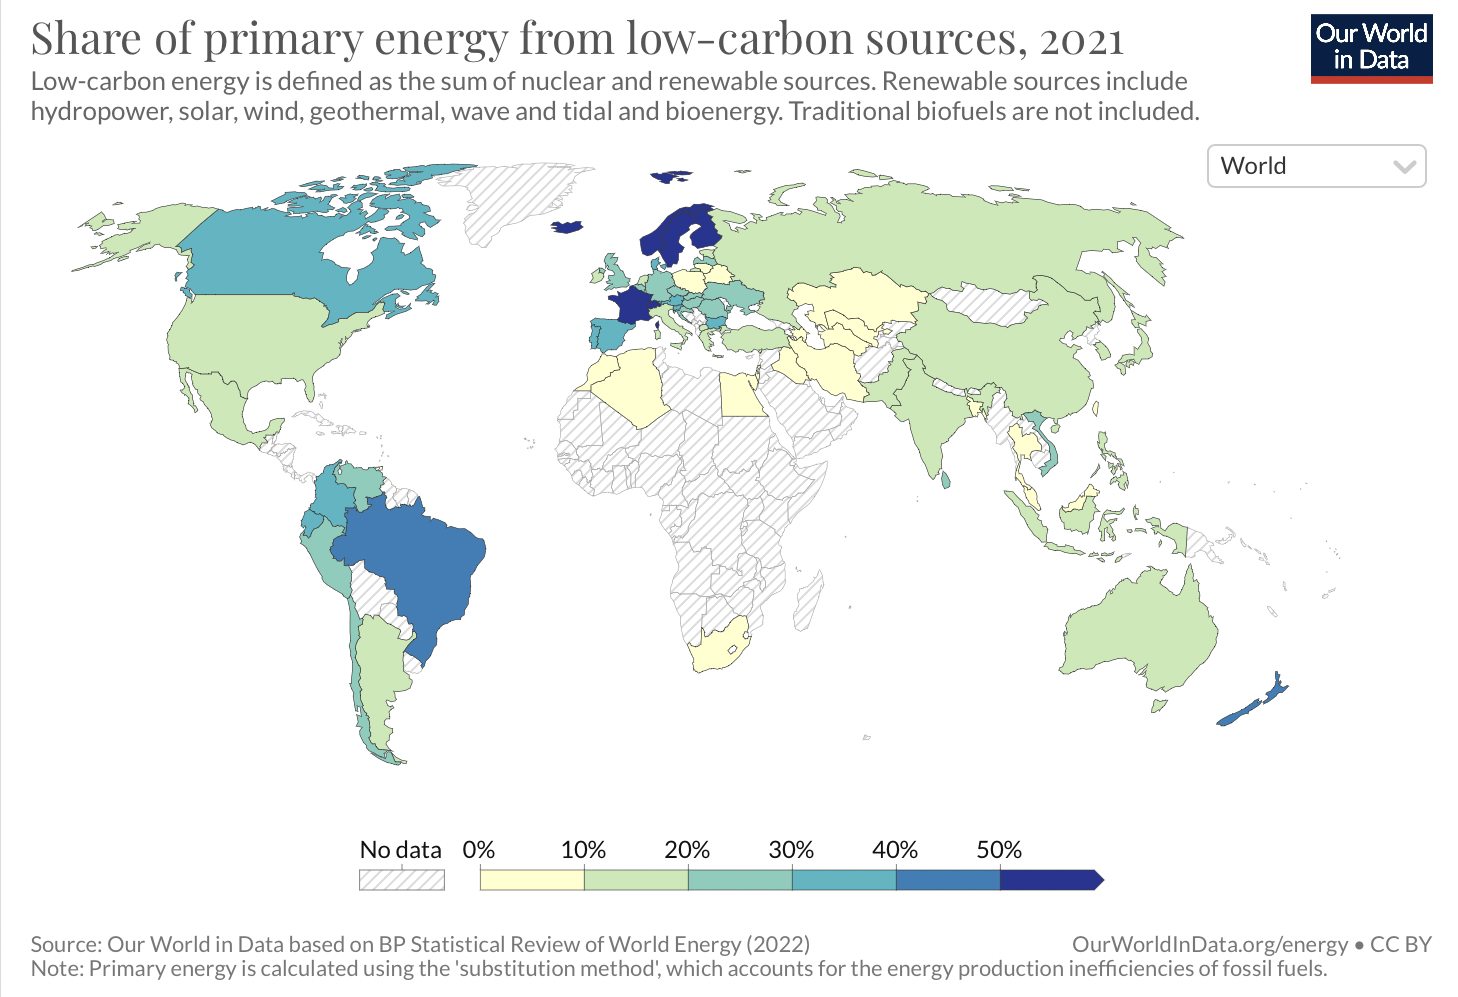

## Data Description

For each desired table we extracted the csv file with all data from 1966 to 2021 and read it into a data from for each type of energy source. A data frame was created for each desired data category: energy from renewables, total energy, energy from low carbon sources, and energy from fossil fuels. 

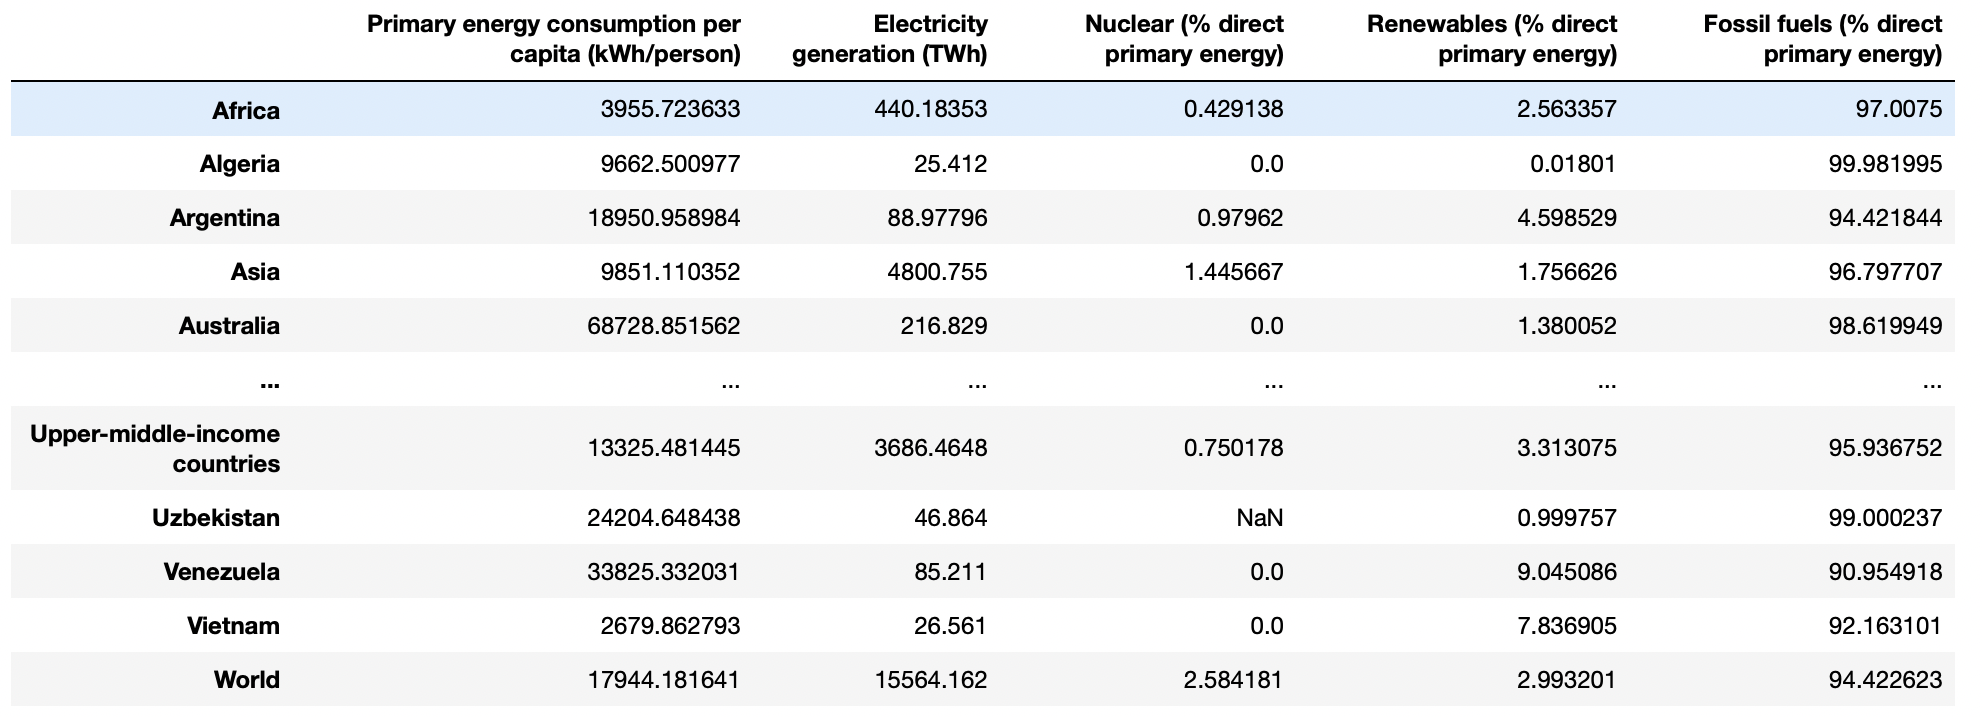

Using specified countries, in our case the United States, we are able to filter out other countries and gather information within each desired category of energy usage. In order to utilize the kmean algorith we sorterd and seperated the countries by economic class in order to attempt to identify a relationship between energy use and ecnomic success.



## Pipeline Overview

#### Extractions of dataframes was not done within a function due to individualized requirements for each data type

### Webscraping and Formatting Data
- `energy_soup()`
    - gets the html content from the desired website

- `get_energy_data_link_list()`
    - gets all links to necessary information within html content

- `clean_df_total()`
    - cleans ant returns a revised version of raw dataframe

- `get_energy_information()`
    - gets information based on type of energy data

- `get_years_tup()`
    - creates tuple from starting year to 2021

- `get_nation_df()`
    - returns dataframe with only one desired nation

- `get_year_df()`
    - returns dataframe with years greater than or equal to inputted year

- `clean_df_change():`
    - returns a new dataframe with the two inputted years and their absolute difference



### Linear Regression 
- `get_mse()`
    - Calculates the mean squared distance between the predicted and actual y
- `show_fit()`
    - Plots linear fit and prints mean squared error
    
### Multiple Regression
- `disp_regress()`
    - Fits data into a linear regression then prints and computes r squared
- `plot_feat_import()`
    - Plots feature importances in a horizontal bar chart
    
### K Means Clustering
- `clean_df_change()`
    - Returns a new dataframe with the two inputted years and their absolute difference
- `get_clean_df_2000()`
    - Extracts the dataframe from the year 2000
- `drop_BP_df()`
    - Drops all countries that end in '(BP)'
- `combine_energy_df()`
    - Given dataframes, column names, and index, return a new dataframe containing
        all the attributes of the inputted dataframes
   

In [1]:
## Pacakges needed for extracting and cleaning.
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import html5lib

In [2]:
## This part is extracting from website
def energy_soup(url):
    """ gets the html content from https://ourworldindata.org
    
    Args:
        url (str): the link to the website, which is'https://ourworldindata.org/energy/country/united-states'
        
    Returns:
        soup (soup): soup object containing the html content from https://ourworldindata.org
    """
    
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    
    return soup

In [3]:
url = 'https://ourworldindata.org/energy/country/united-states'
soup = energy_soup(url)

In [4]:
def get_energy_data_link_list(soup):
    """ gets all the links to the necessary information needed
    
    Args:
        soup (soup): soup object containing the html content from https://ourworldindata.org
        
    Returns:
        energy_data_link_list (list): a list containing all the links for different types of energy consumption data
    """
    
    default_energy_data_link_list = []
    for a in soup.find_all('a', href=True):
        default_energy_data_link_list.append(a['href'])
        
    energy_data_link_list = []
    for href in default_energy_data_link_list:
        if 'tab=chart' in href:
            new_link = href.replace('tab=chart', 'tab=table')
            energy_data_link_list.append(new_link)
            
    return energy_data_link_list

In [5]:
get_energy_data_link_list(soup)

['https://ourworldindata.org/grapher/share-of-the-population-with-access-to-electricity?tab=table',
 'https://ourworldindata.org/grapher/access-to-clean-fuels-and-technologies-for-cooking?tab=table',
 'https://ourworldindata.org/grapher/energy-use-per-capita?tab=table',
 'https://ourworldindata.org/grapher/primary-energy-cons?tab=table',
 'https://ourworldindata.org/grapher/abs-change-energy-consumption?tab=table',
 'https://ourworldindata.org/grapher/per-capita-electricity-generation?tab=table',
 'https://ourworldindata.org/grapher/electricity-generation?tab=table',
 'https://ourworldindata.org/grapher/fossil-fuels-share-energy?tab=table',
 'https://ourworldindata.org/grapher/coal-energy-share?tab=table',
 'https://ourworldindata.org/grapher/oil-share-energy?tab=tablehttps://ourworldindata.org/grapher/oil-share-energy?tab=table',
 'https://ourworldindata.org/grapher/gas-share-energy?tab=table',
 'https://ourworldindata.org/grapher/low-carbon-share-energy?tab=table',
 'https://ourworld

In [6]:
## Load csv file.
df_gas = pd.read_csv('gas_share.csv')

## Code for nations seemed irrelevant as of now. Therefore, removed.
df_gas.drop(['Code'], axis = 1, inplace = True)

## Creates an array of unique countries and its respective tuple. 
countries = df_gas['Entity'].unique()
countries_tup = tuple(countries.tolist())

In [7]:
## Returns a clean dataframe. Takes a starting index year and goes up to current date (2021). 
## Uses these years as columns with country names as rows.
def clean_df_total(unclean_df, year, energy):
    
    ''' returns a cleaned version of raw dataframe
    
    Args:
        unclean_df (DataFrame): raw dataframe retrieved from website
        year (int): the starting index year
        energy (str): the column name of energy values (changes for each link)
        
    Returns:
        df_final (DataFrame): clean version of dataframe with years for columns and countries for 
                              rows
    '''
    
    ## Creates a tuple of years from start index to current.
    mod_yrs_tup = get_years_tup(year)
    
    ## Creates an empty DataFrame 'df_final' and a DataFrame that contains 
    ## only years satisfying condition.
    df_final = pd.DataFrame(columns = mod_yrs_tup, index = countries_tup)
    df_year = get_year_df(unclean_df, year)
    
    ## Loops through all the countries to get their respective energy consumption levels
    ## for each year.
    for country in countries:
        df_temp = get_nation_df(df_year, country)
        energy_list = df_temp[energy].tolist()
        if len(energy_list) == (2022 - year):
            df_final.loc[country, :] = energy_list
            
    ## Returns clean dataframe.
    return df_final

## Helper Functions for clean_df_total
######################################################################################################################

## Creates a tuple from inputted starting index to 2021.
def get_years_tup(year):
    
    ''' creates tuple from starting year to 2021
    
    Args:
        year (int): a year that is before 2021 (serves as starting index)
    
    Returns:
        empty_tup (tuple): a tuple of all the years from starting index to 2021
    '''
    
    ## Create empty tuple.
    empty_tup = ()
    
    ## Iterate for loop from starting index to 2021 and add to 
    ## empty tuple.
    for i in range((2022 - year)):
        yr = year + i
        empty_tup = empty_tup + (yr,)
        
    ## Return final tuple.
    return empty_tup

## Returns a new dataframe with only rows containing inputted nation.
def get_nation_df(df, nation):
    
    ''' returns dataframe with only one nation
    
    Args:
        df (DataFrame): an inputted dataframe with several nations
        nation (str): name of nation that user wants to isolate
    
    Returns:
        df_nation (DataFrame): a dataframe containing only the nation user specified
    '''
    
    ## Find all rows that are equal to given nation.
    nation_bool = (df.loc[:, 'Entity'] == nation)
    df_nation = df.loc[nation_bool, :]
    
    ## Return dataframe containing only specified nation.
    return df_nation

## Returns a new dataframe with only rows that have years greater than or equal to
## the inputted year.
def get_year_df(df, year):
    
    ''' returns dataframe with years greater than or equal to inputted year
    
    Args:
        df (DataFrame): an inputted dataframe with several years
        year (int): the minimum year user wants to start at
    
    Returns:
        df_year (DataFrame): a dataframe containing only the years that are greater than
                             or equal to the given year
    '''
    
    ## Find all rows that satisfy the conditions.
    year_bool = (df.loc[:, 'Year'] >= year)
    df_year = df.loc[year_bool, :]
    
    ## Return dataframe containing only specified years.
    return df_year

In [8]:
## Gives a dataframe that has all countries in the rows and the years as columns.
## Will be able to plot energy levels and see certain trend.
## Third variable 'Gas (% equivalent primary energy)' should be changed when using 
## other dataframes. 
df_final = clean_df_total(df_gas, 2000, 'Gas (% equivalent primary energy)')
df_final

2000       2001       2002       2003       2004  \
Africa               17.357145  19.118074  19.870146  20.108776  20.666647   
Africa (BP)          17.357145  19.118074  19.870142  20.108778  20.666645   
Algeria              63.682522  63.485806  60.518272  61.121452  60.581081   
Argentina            46.221581  44.302299  44.982697  47.943871  49.420341   
Asia                 14.642533  15.069807  15.181625  15.073222  14.777832   
...                        ...        ...        ...        ...        ...   
Uzbekistan           81.183853  81.555687  81.916245  80.547615  81.637924   
Venezuela             37.87727  38.636089  36.671978  34.833828  36.115776   
Vietnam               7.209934   7.973728   8.747701   8.025639  11.543111   
Western Africa (BP)  21.260426  24.854431   27.26903  28.817642  26.949677   
World                21.764505  21.843834  22.002695  21.841295  21.618488   

                          2005       2006       2007       2008       2009  \
Africa               21.263535  21.767887  22.391466  21.938246  21.724113   
Africa (BP)          21.263535  21.767887  22.391466  21.938244  21.724115   
Algeria              61.036648  60.254593  58.504391  57.617252  58.396381   
Argentina            49.695103  48.942928   49.27673  49.187984  49.014137   
Asia                 14.806327  14.850362  15.087613  15.612036   15.69948   
...                        ...        ...        ...        ...        ...   
Uzbekistan           83.403526  82.191261  82.996574  83.393707  83.926224   
Venezuela            33.826984  36.810429  37.162991  35.461788  34.849533   
Vietnam              16.805696  19.928122  18.451748  15.827645  16.526045   
Western Africa (BP)  26.761892  25.652048  29.885275  26.009193  20.881765   
World                21.509075  21.465723  21.674412  21.943287  21.822716   

                     ...       2012       2013       2014       2015  \
Africa               ...  24.537945  24.346651  24.355165  26.228836   
Africa (BP)          ...  24.537945  24.346651  24.355165  26.228832   
Algeria              ...  58.845245   59.81918  61.630821   61.41116   
Argentina            ...  48.324333  46.830532  47.103752  46.814812   
Asia                 ...  16.763247  16.763144   16.94961   17.21484   
...                  ...        ...        ...        ...        ...   
Uzbekistan           ...   85.14225  84.627899  86.105606  86.125359   
Venezuela            ...  34.097572  31.556093  34.620934  38.216267   
Vietnam              ...  14.415589  14.222828   13.46768  12.359764   
Western Africa (BP)  ...  25.607092  24.769148  30.314711  39.510586   
World                ...  22.624765  22.588469  22.482939  22.834978   

                          2016       2017       2018       2019       2020  \
Africa                 26.4272  27.256866  28.377169  27.904596  29.278873   
Africa (BP)            26.4272  27.256866  28.377169  27.904596  29.278873   
Algeria              62.555122  63.262005  64.657791  64.837547   66.62645   
Argentina            48.613922  48.759098  49.520126  50.019932  49.873154   
Asia                 17.278044  17.547556   17.83563  17.839258  18.333124   
...                        ...        ...        ...        ...        ...   
Uzbekistan           84.122887   84.22863  83.193031  83.416687   83.59771   
Venezuela            44.142418   45.36673   45.20163  44.067024  40.313477   
Vietnam              11.382239   9.835996   8.893496   8.165723   7.535929   
Western Africa (BP)   34.33667  33.482327   32.02689  32.006088  33.797104   
World                23.028788  23.206957  23.710005  23.939447  24.545694   

                          2021  
Africa               29.596567  
Africa (BP)          29.596563  
Algeria              66.923851  
Argentina            48.179726  
Asia                 18.367935  
...                        ...  
Uzbekistan           84.907578  
Venezuela            42.488922  
Vietnam               5.935035  
Western Africa (BP) 

In [9]:
## Takes two different years within clean dataframe and finds their abosolute change.
## Later on, plan to find their relative difference as well (percentage from base case).
## However, this is currently difficult as scenario is impossible when base case is either
## 0 or NaN.
def clean_df_change(clean_df, year1, year2):
    
    ''' returns a new dataframe with the two inputted years and their absolute difference
    
    Args:
        clean_df (DataFrame): a dataframe that has already been cleaned using above methods
        year1 (int): our base year
        year2 (int): our final year
    
    Returns:
        df_comp (DataFrame): a dataframe with year1, year2, and their absolute change
    '''
    
    ## Create new column with difference between year1 and year2.
    diff = clean_df[year2] - clean_df[year1]
    
    ## Create new array based on newly created dictionary using year1 and year2.
    comp_arr = {year1: clean_df[year1].tolist(),
                year2: clean_df[year2].tolist()}
    
    ## Create new dataframe and add 'Absolute Change' column.
    df_comp = pd.DataFrame(comp_arr, index = countries_tup)
    df_comp['Absolute Change'] = diff
    
    ## Return new dataframe.
    return df_comp

In [10]:
## Dataframe showing difference between 2001 and 2013.
df_comp = clean_df_change(df_final, 2001, 2013)
df_comp

2001       2013 Absolute Change
Africa               19.118074  24.346651        5.228577
Africa (BP)          19.118074  24.346651        5.228577
Algeria              63.485806  59.819180       -3.666626
Argentina            44.302299  46.830532        2.528233
Asia                 15.069807  16.763144        1.693336
...                        ...        ...             ...
Uzbekistan           81.555687  84.627899        3.072212
Venezuela            38.636089  31.556093       -7.079996
Vietnam               7.973728  14.222828          6.2491
Western Africa (BP)  24.854431  24.769148       -0.085283
World                21.843834  22.588469        0.744635

[114 rows x 3 columns]

In [11]:
## Used another table (Low-carbon energy) to demonstrate how these functions still work.
df_carbon = pd.read_csv('low_carbon_energy.csv')

## Code for nations seemed irrelevant as of now. Therefore, removed.
df_carbon.drop(['Code'], axis = 1, inplace = True)

## Creates an array of unique countries and its respective tuple. 
countries = df_carbon['Entity'].unique()
countries_tup = tuple(countries.tolist())

## Shows raw dataframe of low-carbon energy after removing 'Code'.
df_carbon

Entity  Year  Low-carbon energy (% equivalent primary energy)
0     Africa  1965                                         5.747495
1     Africa  1966                                         6.122062
2     Africa  1967                                         6.325731
3     Africa  1968                                         7.005293
4     Africa  1969                                         7.956088
...      ...   ...                                              ...
6148   World  2017                                        15.634634
6149   World  2018                                        15.979117
6150   World  2019                                        16.572803
6151   World  2020                                        17.788700
6152   World  2021                                        17.724085

[6153 rows x 3 columns]

In [12]:
## Return a clean dataframe of df_carbon using function clean_df_total.
df_final_carbon = clean_df_total(df_carbon, 1980, 'Low-carbon energy (% equivalent primary energy)')
df_final_carbon

1980       1981       1982       1983       1984  \
Africa                8.486036   7.859502   7.378185   6.456583   6.677888   
Africa (BP)           8.486035   7.859502   7.378185   6.456583   6.677888   
Algeria               0.429002    0.50294    0.57087   0.256449   0.513674   
Argentina            10.959656  11.286155  12.366887  13.290648  14.834034   
Asia                   7.29566   7.713212   8.004028   8.298872   8.214079   
...                        ...        ...        ...        ...        ...   
Uzbekistan                 NaN        NaN        NaN        NaN        NaN   
Venezuela             9.454481   9.426736   9.688068  11.105163  12.205676   
Vietnam               8.125603   8.210464   7.957215   5.967464    7.73373   
Western Africa (BP)  13.991064  12.500022   11.68581   7.763474   7.564187   
World                   9.3981   10.06178   10.54682  11.146715  11.671094   

                          1985       1986       1987       1988       1989  \
Africa                7.254731   7.796772   6.976686   7.530003   7.893105   
Africa (BP)           7.254731   7.796772   6.976686   7.530003   7.893105   
Algeria               0.728265   0.266404   0.517427   0.177174   0.224958   
Argentina            16.156569  15.483119  15.696936  11.460011  10.285797   
Asia                   8.40019   8.301808    8.56693   8.515145   8.389826   
...                        ...        ...        ...        ...        ...   
Uzbekistan                 NaN        NaN        NaN        NaN        NaN   
Venezuela            13.293667  13.745109  16.863821  17.953768  18.045057   
Vietnam               7.084222   6.225277   5.438616      7.041  15.831217   
Western Africa (BP)  11.248647  13.799861  12.928176  13.408942  13.807342   
World                12.322081   12.53587  12.671661   12.91251  12.839292   

                     ...       2012       2013       2014       2015  \
Africa               ...    7.71941   7.963459    8.23609   8.090261   
Africa (BP)          ...   7.732393   7.975709   8.247605   8.104401   
Algeria              ...   0.224532   0.064763   0.117502   0.096813   
Argentina            ...  11.999015  12.601711  12.501885  12.732718   
Asia                 ...   7.698314   8.145192   8.740547   9.241367   
...                  ...        ...        ...        ...        ...   
Uzbekistan           ...        NaN        NaN        NaN        NaN   
Venezuela            ...  22.079144  21.720543  22.182087    20.7983   
Vietnam              ...  23.388845  23.877512  23.073971  18.584494   
Western Africa (BP)  ...    9.77925   9.329147   9.392072   7.115945   
World                ...  13.854284  14.217695  14.598155   14.87004   

                          2016       2017       2018       2019       2020  \
Africa                8.052142   8.421671   8.710136   9.178542  10.294399   
Africa (BP)            8.06446   8.433497   8.728121   9.193734  10.314177   
Algeria               0.145807   0.247018   0.287679   0.294747   0.297899   
Argentina            12.313151  12.534226  13.171617  14.221157   15.22998   
Asia                   9.79108  10.312588  10.891339  11.765369  12.588671   
...                        ...        ...        ...        ...        ...   
Uzbekistan                 NaN        NaN        NaN        NaN        NaN   
Venezuela            19.946714   21.93996  22.038906  22.608103  30.139423   
Vietnam              19.181915  24.208347  20.761816  15.891139  19.136663   
Western Africa (BP)   7.308041   7.928968   7.579378   8.321297   8.160048   
World                15.278627  15.634634  15.979117  16.572803    17.7887   

                          2021  
Africa               10.027145  
Africa (BP)          10.046248  
Algeria               0.261367  
Argentina            14.181903  
Asia                 13.027586  
...                        ...  
Uzbekistan                 NaN  
Venezuela            28.434155  
Vietnam              22.734407  
Western Africa (BP) 

In [13]:
## Show absolute change from years 2004 and 2020 in df_final_carbon using function
## clean_df_change.
df_comp_carbon = clean_df_change(df_final_carbon, 2004, 2020)
df_comp_carbon

2004       2020 Absolute Change
Africa                7.908752  10.294399        2.385647
Africa (BP)           7.925557  10.314177         2.38862
Algeria               0.206787   0.297899        0.091113
Argentina            15.107034  15.229980        0.122947
Asia                  8.197720  12.588671        4.390951
...                        ...        ...             ...
Uzbekistan                 NaN        NaN             NaN
Venezuela            23.130436  30.139423        7.008987
Vietnam              14.763954  19.136663        4.372709
Western Africa (BP)  11.732572   8.160048       -3.572523
World                13.703746  17.788700        4.084954

[114 rows x 3 columns]

In [14]:
df_comp_reset = df_comp.reset_index()
df_comp_graph = df_comp_reset.rename(columns={'index':'Nation'})
df_comp_graph

Nation       2001       2013 Absolute Change
0                 Africa  19.118074  24.346651        5.228577
1            Africa (BP)  19.118074  24.346651        5.228577
2                Algeria  63.485806  59.819180       -3.666626
3              Argentina  44.302299  46.830532        2.528233
4                   Asia  15.069807  16.763144        1.693336
..                   ...        ...        ...             ...
109           Uzbekistan  81.555687  84.627899        3.072212
110            Venezuela  38.636089  31.556093       -7.079996
111              Vietnam   7.973728  14.222828          6.2491
112  Western Africa (BP)  24.854431  24.769148       -0.085283
113                World  21.843834  22.588469        0.744635

[114 rows x 4 columns]

In [15]:
df_final_carbon

1980       1981       1982       1983       1984  \
Africa                8.486036   7.859502   7.378185   6.456583   6.677888   
Africa (BP)           8.486035   7.859502   7.378185   6.456583   6.677888   
Algeria               0.429002    0.50294    0.57087   0.256449   0.513674   
Argentina            10.959656  11.286155  12.366887  13.290648  14.834034   
Asia                   7.29566   7.713212   8.004028   8.298872   8.214079   
...                        ...        ...        ...        ...        ...   
Uzbekistan                 NaN        NaN        NaN        NaN        NaN   
Venezuela             9.454481   9.426736   9.688068  11.105163  12.205676   
Vietnam               8.125603   8.210464   7.957215   5.967464    7.73373   
Western Africa (BP)  13.991064  12.500022   11.68581   7.763474   7.564187   
World                   9.3981   10.06178   10.54682  11.146715  11.671094   

                          1985       1986       1987       1988       1989  \
Africa                7.254731   7.796772   6.976686   7.530003   7.893105   
Africa (BP)           7.254731   7.796772   6.976686   7.530003   7.893105   
Algeria               0.728265   0.266404   0.517427   0.177174   0.224958   
Argentina            16.156569  15.483119  15.696936  11.460011  10.285797   
Asia                   8.40019   8.301808    8.56693   8.515145   8.389826   
...                        ...        ...        ...        ...        ...   
Uzbekistan                 NaN        NaN        NaN        NaN        NaN   
Venezuela            13.293667  13.745109  16.863821  17.953768  18.045057   
Vietnam               7.084222   6.225277   5.438616      7.041  15.831217   
Western Africa (BP)  11.248647  13.799861  12.928176  13.408942  13.807342   
World                12.322081   12.53587  12.671661   12.91251  12.839292   

                     ...       2012       2013       2014       2015  \
Africa               ...    7.71941   7.963459    8.23609   8.090261   
Africa (BP)          ...   7.732393   7.975709   8.247605   8.104401   
Algeria              ...   0.224532   0.064763   0.117502   0.096813   
Argentina            ...  11.999015  12.601711  12.501885  12.732718   
Asia                 ...   7.698314   8.145192   8.740547   9.241367   
...                  ...        ...        ...        ...        ...   
Uzbekistan           ...        NaN        NaN        NaN        NaN   
Venezuela            ...  22.079144  21.720543  22.182087    20.7983   
Vietnam              ...  23.388845  23.877512  23.073971  18.584494   
Western Africa (BP)  ...    9.77925   9.329147   9.392072   7.115945   
World                ...  13.854284  14.217695  14.598155   14.87004   

                          2016       2017       2018       2019       2020  \
Africa                8.052142   8.421671   8.710136   9.178542  10.294399   
Africa (BP)            8.06446   8.433497   8.728121   9.193734  10.314177   
Algeria               0.145807   0.247018   0.287679   0.294747   0.297899   
Argentina            12.313151  12.534226  13.171617  14.221157   15.22998   
Asia                   9.79108  10.312588  10.891339  11.765369  12.588671   
...                        ...        ...        ...        ...        ...   
Uzbekistan                 NaN        NaN        NaN        NaN        NaN   
Venezuela            19.946714   21.93996  22.038906  22.608103  30.139423   
Vietnam              19.181915  24.208347  20.761816  15.891139  19.136663   
Western Africa (BP)   7.308041   7.928968   7.579378   8.321297   8.160048   
World                15.278627  15.634634  15.979117  16.572803    17.7887   

                          2021  
Africa               10.027145  
Africa (BP)          10.046248  
Algeria               0.261367  
Argentina            14.181903  
Asia                 13.027586  
...                        ...  
Uzbekistan                 NaN  
Venezuela            28.434155  
Vietnam              22.734407  
Western Africa (BP) 

In [16]:
# Imports to display visual representations

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import plotly.express as px

In [17]:
df_comp_graph.head(10)

Nation       2001       2013 Absolute Change
0             Africa  19.118074  24.346651        5.228577
1        Africa (BP)  19.118074  24.346651        5.228577
2            Algeria  63.485806  59.819180       -3.666626
3          Argentina  44.302299  46.830532        2.528233
4               Asia  15.069807  16.763144        1.693336
5  Asia Pacific (BP)   9.770863  11.196468        1.425606
6          Australia  16.853859  22.336828        5.482969
7            Austria  20.446037  19.937805       -0.508232
8         Azerbaijan  59.711735  61.237133        1.525398
9         Bangladesh  65.194008  73.097160        7.903152

C:\Users\Alex Hwang\AppData\Local\Temp\ipykernel_29564\2867887239.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',
posx and posy should be finite values
posx and posy should be finite values


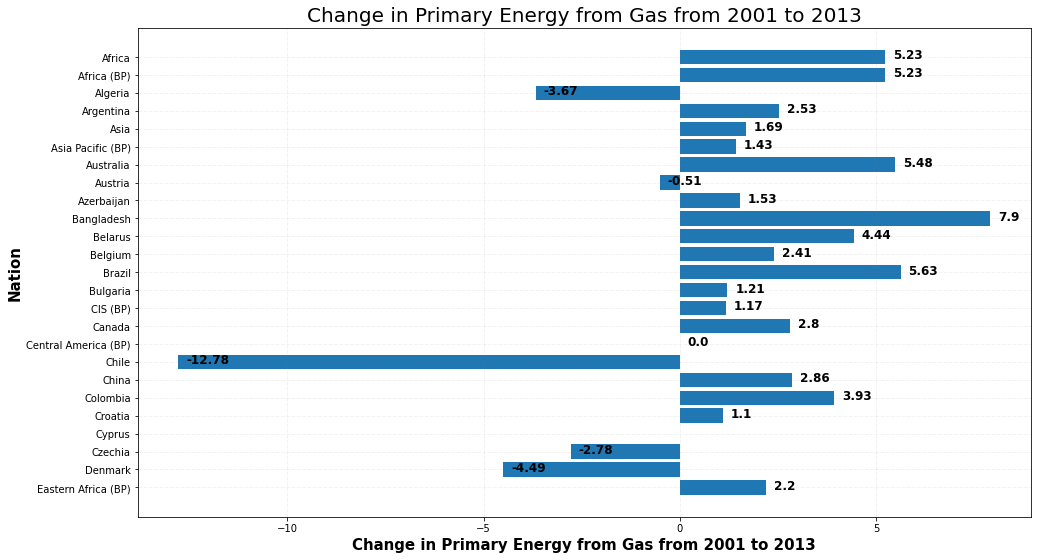

In [18]:
# Bar Graph
nation = df_comp_graph['Nation'].head(25)
change = df_comp_graph['Absolute Change'].head(25)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(nation, change)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='black')
    
# Add Plot Title
ax.set_title('Change in Primary Energy from Gas from 2001 to 2013', fontsize = 20)

# Add Labels
ax.set_xlabel('Change in Primary Energy from Gas from 2001 to 2013', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Nation', fontweight ='bold', fontsize = 15)

# Show Plot
plt.show()

In [19]:
# Sort the df to be graphed in a manner that is easier to read and analyze
df_comp_graph = df_comp_graph.sort_values(by=['Absolute Change'])
fig = px.scatter(df_comp_graph, x = 'Nation', y = 'Absolute Change', color = 'Nation', 
                 labels = {'y' : 'Absolute Change', 'x' : 'Nation'}, hover_data = ['Nation', 'Absolute Change'],
                 title = 'Evolution of Energy from 2001 to 2013')
fig.show()

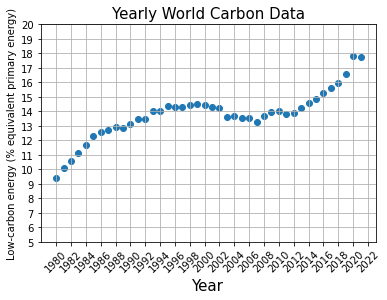

In [20]:
# Graph that represents the trend carbon data

# Initializes lists in which data can be added to aid in graphing
yr_lst = []
world_lst = []
# Iterates through columns to get the list for x values
for i in df_final_carbon.columns:
    yr_lst.append(i)
# Finds the row for world data and appends it to a list for the y values
world_lst.append(df_final_carbon.iloc[len(df_final_carbon)-1])
    
plt.scatter(x = yr_lst, y = world_lst)
plt.xticks(np.arange(1980, 2023, step=2), fontsize = 10)
plt.yticks(np.arange(5, 21, step=1), fontsize = 10)
plt.xticks(rotation = 45)
plt.grid()
plt.title("Yearly World Carbon Data", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Low-carbon energy (% equivalent primary energy)", fontsize = 10)
plt.show()

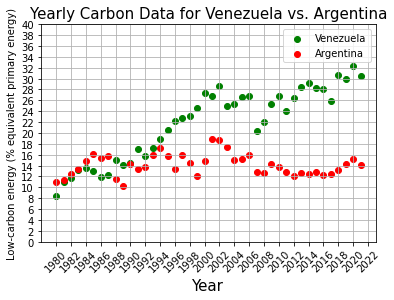

In [21]:
# Graph that represents data points of yearly carbon for Venzuela and Argentina

country1 = 'Venezuela'
country2 = 'Argentina'
#initializes lists
yr_lst = []
country1_lst = []
country2_lst = []
#iterates through columns
for i in df_final_carbon.columns:
    yr_lst.append(i)
#finds location of two countries and appends their rows to individual lists
country1_lst.append(df_final_carbon.iloc[13])
country2_lst.append(df_final_carbon.iloc[3])
    
plt.scatter(x = yr_lst, y = country1_lst, color = 'green')
plt.scatter(x = yr_lst, y = country2_lst, color = 'red')
plt.xticks(np.arange(1980, 2023, step=2), fontsize = 10, rotation = 45)
plt.yticks(np.arange(0, 42, step=2), fontsize = 10)
plt.grid()
plt.title(f"Yearly Carbon Data for {country1} vs. {country2}", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Low-carbon energy (% equivalent primary energy)", fontsize = 10)
plt.legend(["Venezuela", "Argentina"], loc=0)
plt.show()

## Method

We predict that the natural global and national trend of energy consumption is on the rise. However, we also suspect that individual countries will tend to push more utilization of non-carbon energy sources lowering the future reliance, prodution, and usage of carbon sources. In order to analyze these predictions and trends, we implemented some algorithms that could give us a lead to how certain features affect and/or predict energy trends around the world.

A few algorithms and approaches can be used in order to determine the future patterns of energy. Firstly, web scraping can be utilized to extract desirebale data from energy websites that can be read into dataframes and analyzed. Afterwards, linear regression can be used to determine the slope of energy data which can then be used to predict future aspects of global energy. Another algorithm is multiple regression, which can be predict global energy trends based off of several features, such as (for example) fossil fuel usage, low-carbon sources usage, and renewables usage. K-Means clustering could also be used to solve for similarities and reltionships between countries and their energy production and consumption rates.

### Linear Regression

Linear regression was chosen as we wanted to be able to determine the slope of energy data in different countries in order to predict future global energy trends around the world. Linear regression is a suitable algorithm that predicts a continuous number based on the input data. In this case, we decided to observe how USA's energy from fossil fuels affects the overall energy consumption of USA. Using the data extracted from the website, we can notice trends on energy consumption of USA, and predict future outcomes.

In [22]:
# Imports needed for ML

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, r2_score
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
import pylab as py
import warnings

warnings.filterwarnings("ignore")

In [23]:
# Gets the information about how much energy the USA consumes

# Reads the csv file
df_energy_consumption = pd.read_csv('primary-energy-cons.csv')

# Only get the information about USA
df_energy_consumption_USA = df_energy_consumption.loc[df_energy_consumption['Code'] == 'USA']

# Present dataframe
df_energy_consumption_USA

Entity Code  Year  Primary energy consumption (TWh)
11979  United States  USA  1965                      14439.701172
11980  United States  USA  1966                      15247.363281
11981  United States  USA  1967                      15778.539062
11982  United States  USA  1968                      16719.384766
11983  United States  USA  1969                      17583.423828
11984  United States  USA  1970                      18205.839844
11985  United States  USA  1971                      18589.007812
11986  United States  USA  1972                      19514.082031
11987  United States  USA  1973                      20339.794922
11988  United States  USA  1974                      19842.607422
11989  United States  USA  1975                      19319.482422
11990  United States  USA  1976                      20376.509766
11991  United States  USA  1977                      20895.646484
11992  United States  USA  1978                      21359.291016
11993  United States  USA  1979                      21584.400391
11994  United States  USA  1980                      20751.958984
11995  United States  USA  1981                      20138.093750
11996  United States  USA  1982                      19318.140625
11997  United States  USA  1983                      19250.531250
11998  United States  USA  1984                      20235.689453
11999  United States  USA  1985                      20184.244141
12000  United States  USA  1986                      20371.966797
12001  United States  USA  1987                      21056.052734
12002  United States  USA  1988                      22014.886719
12003  United States  USA  1989                      22548.132812
12004  United States  USA  1990                      22606.613281
12005  United States  USA  1991                      22576.310547
12006  United States  USA  1992                      22909.343750
12007  United States  USA  1993                      23390.023438
12008  United States  USA  1994                      23820.388672
12009  United States  USA  1995                      24340.916016
12010  United States  USA  1996                      25161.398438
12011  United States  USA  1997                      25350.253906
12012  United States  USA  1998                      25512.498047
12013  United States  USA  1999                      25965.105469
12014  United States  USA  2000                      26545.425781
12015  United States  USA  2001                      25912.781250
12016  United States  USA  2002                      26297.847656
12017  United States  USA  2003                      26380.111328
12018  United States  USA  2004                      26897.548828
12019  United States  USA  2005                      26910.132812
12020  United States  USA  2006                      26698.119141
12021  United States  USA  2007                      27063.787109
12022  United States  USA  2008                      26405.515625
12023  United States  USA  2009                      25105.531250
12024  United States  USA  2010                      25951.865234
12025  United States  USA  2011                      25726.064453
12026  United States  USA  2012                      25047.865234
12027  United States  USA  2013                      25727.750000
12028  United States  USA  2014                      25996.218750
12029  United States  USA  2015                      25747.033203
12030  United States  USA  2016                      25723.152344
12031  United States  USA  2017                      25819.031250
12032  United States  USA  2018                      26762.472656
12033  United States  USA  2019                      26571.660156
12034  United States  USA  2020                      24593.222656
12035  United States  USA  2021                      25825.460938

In [24]:
# Gets the information about how much of USA's energy comes from fossil fuels

# Reads the csv file
df_energy_from_fossil_fuels = pd.read_csv('fossil-fuels-share-energy.csv')

# Only get the information about USA
df_energy_from_fossil_fuels_USA = df_energy_from_fossil_fuels.loc[df_energy_from_fossil_fuels['Code'] == 'USA']

# Present dataframe
df_energy_from_fossil_fuels_USA

Entity Code  Year  Fossil fuels (% equivalent primary energy)
5689  United States  USA  1965                                   95.555481
5690  United States  USA  1966                                   95.720467
5691  United States  USA  1967                                   95.312866
5692  United States  USA  1968                                   95.445206
5693  United States  USA  1969                                   95.164528
5694  United States  USA  1970                                   95.241470
5695  United States  USA  1971                                   94.773270
5696  United States  USA  1972                                   94.646019
5697  United States  USA  1973                                   94.419357
5698  United States  USA  1974                                   93.381477
5699  United States  USA  1975                                   92.326027
5700  United States  USA  1976                                   92.646027
5701  United States  USA  1977                                   92.864525
5702  United States  USA  1978                                   91.807243
5703  United States  USA  1979                                   92.177757
5704  United States  USA  1980                                   91.966446
5705  United States  USA  1981                                   91.618996
5706  United States  USA  1982                                   90.371223
5707  United States  USA  1983                                   89.758575
5708  United States  USA  1984                                   89.829651
5709  United States  USA  1985                                   89.556381
5710  United States  USA  1986                                   89.031128
5711  United States  USA  1987                                   89.327118
5712  United States  USA  1988                                   89.185318
5713  United States  USA  1989                                   88.686310
5714  United States  USA  1990                                   87.653648
5715  United States  USA  1991                                   87.171440
5716  United States  USA  1992                                   87.671333
5717  United States  USA  1993                                   87.635292
5718  United States  USA  1994                                   87.714653
5719  United States  USA  1995                                   86.974579
5720  United States  USA  1996                                   86.971863
5721  United States  USA  1997                                   87.477859
5722  United States  USA  1998                                   87.416931
5723  United States  USA  1999                                   87.039185
5724  United States  USA  2000                                   87.489929
5725  United States  USA  2001                                   87.774239
5726  United States  USA  2002                                   87.238998
5727  United States  USA  2003                                   87.338982
5728  United States  USA  2004                                   87.365303
5729  United States  USA  2005                                   87.375877
5730  United States  USA  2006                                   86.846451
5731  United States  USA  2007                                   87.116364
5732  United States  USA  2008                                   86.329178
5733  United States  USA  2009                                   85.223854
5734  United States  USA  2010                                   85.441658
5735  United States  USA  2011                                   84.543571
5736  United States  USA  2012                                   84.606895
5737  United States  USA  2013                                   84.422668
5738  United States  USA  2014                                   84.345833
5739  United States  USA  2015                                   84.109077
5740  United States  USA  2016                                   83.245270
5741  United States  USA  2017        

In [25]:
# Gets the information about how much of USA's energy comes from low-carbon sources

# Reads the csv file
df_energy_from_low_carbon = pd.read_csv('low-carbon-share-energy.csv')

# Only get the information about USA
df_energy_from_low_carbon_USA = df_energy_from_low_carbon.loc[df_energy_from_low_carbon['Code'] == 'USA']

# Present dataframe
df_energy_from_low_carbon_USA

Entity Code  Year  \
5774  United States  USA  1965   
5775  United States  USA  1966   
5776  United States  USA  1967   
5777  United States  USA  1968   
5778  United States  USA  1969   
5779  United States  USA  1970   
5780  United States  USA  1971   
5781  United States  USA  1972   
5782  United States  USA  1973   
5783  United States  USA  1974   
5784  United States  USA  1975   
5785  United States  USA  1976   
5786  United States  USA  1977   
5787  United States  USA  1978   
5788  United States  USA  1979   
5789  United States  USA  1980   
5790  United States  USA  1981   
5791  United States  USA  1982   
5792  United States  USA  1983   
5793  United States  USA  1984   
5794  United States  USA  1985   
5795  United States  USA  1986   
5796  United States  USA  1987   
5797  United States  USA  1988   
5798  United States  USA  1989   
5799  United States  USA  1990   
5800  United States  USA  1991   
5801  United States  USA  1992   
5802  United States  USA  1993   
5803  United States  USA  1994   
5804  United States  USA  1995   
5805  United States  USA  1996   
5806  United States  USA  1997   
5807  United States  USA  1998   
5808  United States  USA  1999   
5809  United States  USA  2000   
5810  United States  USA  2001   
5811  United States  USA  2002   
5812  United States  USA  2003   
5813  United States  USA  2004   
5814  United States  USA  2005   
5815  United States  USA  2006   
5816  United States  USA  2007   
5817  United States  USA  2008   
5818  United States  USA  2009   
5819  United States  USA  2010   
5820  United States  USA  2011   
5821  United States  USA  2012   
5822  United States  USA  2013   
5823  United States  USA  2014   
5824  United States  USA  2015   
5825  United States  USA  2016   
5826  United States  USA  2017   
5827  United States  USA  2018   
5828  United States  USA  2019   
5829  United States  USA  2020   
5830  United States  USA  2021   

      Low-carbon energy (% equivalent primary energy)  
5774                                         4.444509  
5775                                         4.279533  
5776                                         4.687128  
5777                                         4.554789  
5778                                         4.835467  
5779                                         4.758528  
5780                                         5.226734  
5781                                         5.353975  
5782                                         5.580639  
5783                                         6.618513  
5784                                         7.673963  
5785                                         7.353968  
5786                                         7.135481  
5787                                         8.192759  
5788                                         7.822246  
5789                                         8.033563  
5790                                         8.381010  
5791                                         9.628786  
5792                                        10.241426  
5793                                        10.170345  
5794                                        10.443619  
5795                                        10.968867  
5796                                        10.672887  
5797                                        10.814678  
5798                                        11.313685  
5799                                        12.346358  
5800                                        12.828552  
5801                                        12.328667  
5802                                        12.364702  
5803                                        12.285343  
5804                                        13.025415  
5805                                        13.028134  
5806                                        12.522133  
5807                                        12.583076  
5808                                        12.960815  
5809                    

In [26]:
# Gets the information about how much of USA's energy comes from renewables

# Reads the csv file
df_energy_from_renewables = pd.read_csv('energy.csv')

# Only get the information about USA
df_energy_from_renewables_USA = df_energy_from_renewables.loc[df_energy_from_renewables['Code'] == 'USA']

# Present dataframe
df_energy_from_renewables_USA

Entity Code  Year  Renewables (% equivalent primary energy)
5774  United States  USA  1965                                  4.368870
5775  United States  USA  1966                                  4.171402
5776  United States  USA  1967                                  4.542216
5777  United States  USA  1968                                  4.330974
5778  United States  USA  1969                                  4.598878
5779  United States  USA  1970                                  4.400803
5780  United States  USA  1971                                  4.614475
5781  United States  USA  1972                                  4.526047
5782  United States  USA  1973                                  4.354760
5783  United States  USA  1974                                  4.902865
5784  United States  USA  1975                                  5.006975
5785  United States  USA  1976                                  4.552708
5786  United States  USA  1977                                  3.549314
5787  United States  USA  1978                                  4.327570
5788  United States  USA  1979                                  4.291406
5789  United States  USA  1980                                  4.419221
5790  United States  USA  1981                                  4.336749
5791  United States  USA  1982                                  5.256711
5792  United States  USA  1983                                  5.684815
5793  United States  USA  1984                                  5.334361
5794  United States  USA  1985                                  4.765776
5795  United States  USA  1986                                  4.898404
5796  United States  USA  1987                                  4.214754
5797  United States  USA  1988                                  3.665000
5798  United States  USA  1989                                  4.301543
5799  United States  USA  1990                                  4.724677
5800  United States  USA  1991                                  4.724286
5801  United States  USA  1992                                  4.261231
5802  United States  USA  1993                                  4.571410
5803  United States  USA  1994                                  4.254817
5804  United States  USA  1995                                  4.762141
5805  United States  USA  1996                                  5.018571
5806  United States  USA  1997                                  5.115221
5807  United States  USA  1998                                  4.695757
5808  United States  USA  1999                                  4.583452
5809  United States  USA  2000                                  4.027357
5810  United States  USA  2001                                  3.421371
5811  United States  USA  2002                                  4.015507
5812  United States  USA  2003                                  4.180040
5813  United States  USA  2004                                  4.101511
5814  United States  USA  2005                                  4.219231
5815  United States  USA  2006                                  4.678861
5816  United States  USA  2007                                  4.373009
5817  United States  USA  2008                                  5.004550
5818  United States  USA  2009                                  5.800006
5819  United States  USA  2010                                  5.840555
5820  United States  USA  2011                                  6.897319
5821  United States  USA  2012                                  6.886334
5822  United States  USA  2013                                  7.134616
5823  United States  USA  2014                                  7.262891
5824  United States  USA  2015                                  7.468743
5825  United States  USA  2016                                  8.285086
5826  United States  USA  2017                                  9.082049
5827  United States  USA  2018                                  8.96493

In [27]:
# A dataframe of all the combined information mentioned previously

# Create a new dataframe with the energy consumption dataframe
df_energy_USA = df_energy_consumption_USA

# Add a new column with only the information about how much energy comes from fossil fuels
df_energy_USA['Fossil fuels (% equivalent primary energy)'] = df_energy_from_fossil_fuels_USA['Fossil fuels (% equivalent primary energy)'].values

# Add a new column with only the information about how much energy comes from low-carbon sources
df_energy_USA['Low-carbon energy (% equivalent primary energy)'] = df_energy_from_low_carbon_USA['Low-carbon energy (% equivalent primary energy)'].values

# Add a new column with only the information about how much energy comes from ewnewables
df_energy_USA['Renewables (% equivalent primary energy)'] = df_energy_from_renewables_USA['Renewables (% equivalent primary energy)'].values

# Present new, clean dataframe
df_energy_USA

Entity Code  Year  Primary energy consumption (TWh)  \
11979  United States  USA  1965                      14439.701172   
11980  United States  USA  1966                      15247.363281   
11981  United States  USA  1967                      15778.539062   
11982  United States  USA  1968                      16719.384766   
11983  United States  USA  1969                      17583.423828   
11984  United States  USA  1970                      18205.839844   
11985  United States  USA  1971                      18589.007812   
11986  United States  USA  1972                      19514.082031   
11987  United States  USA  1973                      20339.794922   
11988  United States  USA  1974                      19842.607422   
11989  United States  USA  1975                      19319.482422   
11990  United States  USA  1976                      20376.509766   
11991  United States  USA  1977                      20895.646484   
11992  United States  USA  1978                      21359.291016   
11993  United States  USA  1979                      21584.400391   
11994  United States  USA  1980                      20751.958984   
11995  United States  USA  1981                      20138.093750   
11996  United States  USA  1982                      19318.140625   
11997  United States  USA  1983                      19250.531250   
11998  United States  USA  1984                      20235.689453   
11999  United States  USA  1985                      20184.244141   
12000  United States  USA  1986                      20371.966797   
12001  United States  USA  1987                      21056.052734   
12002  United States  USA  1988                      22014.886719   
12003  United States  USA  1989                      22548.132812   
12004  United States  USA  1990                      22606.613281   
12005  United States  USA  1991                      22576.310547   
12006  United States  USA  1992                      22909.343750   
12007  United States  USA  1993                      23390.023438   
12008  United States  USA  1994                      23820.388672   
12009  United States  USA  1995                      24340.916016   
12010  United States  USA  1996                      25161.398438   
12011  United States  USA  1997                      25350.253906   
12012  United States  USA  1998                      25512.498047   
12013  United States  USA  1999                      25965.105469   
12014  United States  USA  2000                      26545.425781   
12015  United States  USA  2001                      25912.781250   
12016  United States  USA  2002                      26297.847656   
12017  United States  USA  2003                      26380.111328   
12018  United States  USA  2004                      26897.548828   
12019  United States  USA  2005                      26910.132812   
12020  United States  USA  2006                      26698.119141   
12021  United States  USA  2007                      27063.787109   
12022  United States  USA  2008                      26405.515625   
12023  United States  USA  2009                      25105.531250   
12024  United States  USA  2010                      25951.865234   
12025  United States  USA  2011                      25726.064453   
12026  United States  USA  2012                      25047.865234   
12027  United States  USA  2013                      25727.750000   
12028  United States  USA  2014                      25996.218750   
12029  United States  USA  2015                      25747.033203   
12030  United States  USA  2016                      25723.152344   
12031  United States  USA  2017                      25819.031250   
12032  United States  USA  2018                      26762.472656   
12033  United States  USA  2019                      26571.660156   
12034  United States  USA  2020                      24593.222656   
12035  United States  USA  2021                      25825.460938   

       Foss

In [28]:
x = np.array(df_energy_USA['Fossil fuels (% equivalent primary energy)']).reshape(-1, 1)
y = np.array(df_energy_USA['Primary energy consumption (TWh)'])

# 10-fold Cross Validation
kfold = KFold(n_splits=10)

# Initialize sklearn model
reg = LinearRegression()

# Initialize y_pred, stores predictions of y
y_pred = np.empty_like(y)

for train_idx, test_idx in kfold.split(x, y):
    # Get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # Get test data    
    x_test = x[test_idx, :]
    
    # Fit data
    reg = reg.fit(x_train, y_train)
    
    # Estimate on test data
    y_pred[test_idx] = reg.predict(x_test)
    

In [29]:
# Calculate r squared
r2_score(y_true=y, y_pred=y_pred)

0.6402585407502364

In [30]:
def get_mse(y_true, y_pred):
    # Calculate the mean squared distance between the predicted and actual y
    return np.mean((y_pred - y_true) ** 2)

def show_fit(x, y, slope, intercept):
    plt.figure()
    
    # Transform the input data into numpy arrays and flatten them for easier processing
    x = np.array(x).ravel()
    y = np.array(y).ravel()
    
    # Plot the actual data
    plt.scatter(x, y, label='data')
    
    # Compute linear predictions 
    # x is a numpy array so each element gets multiplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # Plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='linear fit')
    
    plt.legend()
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Print the mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    plt.suptitle(f'y_hat = {slope:.2f} * x + {intercept:.2f}, MSE = {mse:.3f}')
 

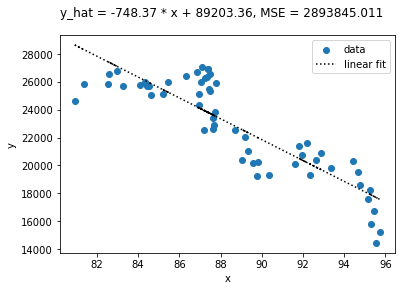

In [31]:
# Initialize sklearn model
reg = LinearRegression()

# Fit the model
reg.fit(x, y) 

# Get the slope
slope = reg.coef_[0]

# Get the intercept
intercept = reg.intercept_

y_pred = reg.predict(x) # Same as y_pred = slope * x + intercept

show_fit(x, y, slope, intercept)

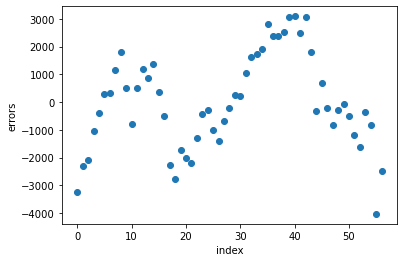

In [32]:
# Check independence
errors = y - y_pred
plt.scatter(x = range(len(y)), y = errors)
plt.xlabel('index')
plt.ylabel('errors');

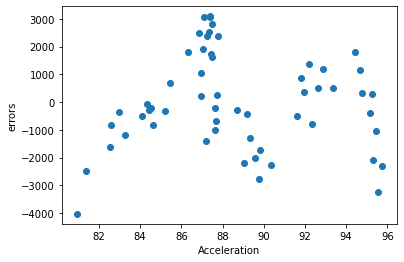

In [33]:
# Check constant variance
plt.scatter(x = x, y = errors)
plt.xlabel('Acceleration')
plt.ylabel('errors');

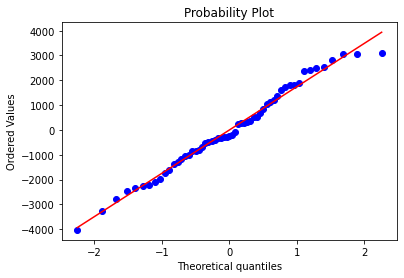

In [34]:
# Check normality
stats.probplot(errors, dist="norm", plot=py)
py.show()

### Results

Based on our linear regression machine learning algorithm, the current linear regression model is interpreted as for every percent of USA's energy that comes from fossil fuels, USA's energy consumption decreases by 748.37. However, this interpretation is poor, as it seem reasonable due to enternal factors; thus, if you flip the linear regression model horizontally, where the x-values (Fossil fuels (% equivalent primary energy)) is in descending order, you can interpret as for every secrease in percent of USA's energy that comes from fossil fuels, USA's energy consumption increases by 748.37.

Additionally, the linear regression model calculated the $R^2$ value to be 0.6402585407502364, which means that 64.03% of the variability in USA's energy consumption can be explained by USA's energy that comes from fossil fuels. In other words, USA's energy that comes from fossil fuels explains 64.03% of the variation where USA's energy consumption is decreased.

Based on the three assumptions of independence, costant variance, and normality, the only assumption that seems to be well met is normality, and there is a noticable pattern between independence and constant variance. This suggests that there are other features that affect USA's energy consumption that we're accouting for, which would lead us to examining a multiple regression framework.

### Multiple Regression

To follow up with the linear regression machine learning algorithm, we chose to do multiple regression machine learning to be able to determine which features affect USA's energy conumption the most. Multiple regression is a suitabl algorithm that uses multiple features to predict a single variable. In this case, we used USA's energy from fossil fuels, low-carbon sources, and renewables as features to predict which features were most impactful.

In [35]:
def disp_regress(df, x_feat_list, y_feat, verbose=True):
    """ linear regression, displays model w/ coef
    
    Args:
        df (pd.DataFrame): dataframe
        x_feat_list (list): list of all features in model
        y_feat (list): target feature
        verbose (bool): toggles command line output
        
    Returns:
        reg (LinearRegression): model fit to data
    """
    # initialize regression object
    reg = LinearRegression()

    # get target variable
    x = df.loc[:, x_feat_list].values
    y = df.loc[:, y_feat].values

    # fit regression
    reg.fit(x, y)

    # compute / store r2
    y_pred = reg.predict(x)
    
    if verbose:
        # print model  
        model_str = y_feat + f' = {reg.intercept_:.2f}'
        for feat, coef in zip(x_feat_list, reg.coef_):
            model_str += f' + {coef:.2f} {feat}'
        print(model_str)

        # compute / print r2
        r2 = r2_score(y_true=y, y_pred=y_pred)
        print(f'r2 = {r2:.3}')
    
    return reg

In [36]:
disp_regress(df_energy_USA, x_feat_list = ['Fossil fuels (% equivalent primary energy)', 'Low-carbon energy (% equivalent primary energy)', 'Renewables (% equivalent primary energy)'], y_feat = 'Primary energy consumption (TWh)')

Primary energy consumption (TWh) = -419238038.44 + 4192541.46 Fossil fuels (% equivalent primary energy) + 4193547.49 Low-carbon energy (% equivalent primary energy) + -876.42 Renewables (% equivalent primary energy)
r2 = 0.851


LinearRegression()

In [37]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # Sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # Limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # Plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in MSE across all Decision Trees)')

In [38]:
from sklearn.ensemble import RandomForestRegressor

y_feat = 'Primary energy consumption (TWh)'
x_feat_list = ['Fossil fuels (% equivalent primary energy)', 'Low-carbon energy (% equivalent primary energy)', 'Renewables (% equivalent primary energy)']

# Initialize regression object
rand_forest_regressor = RandomForestRegressor()

# Get target variable
x = df_energy_USA.loc[:, x_feat_list].values
y = df_energy_USA.loc[:, y_feat].values

# Fit regression
rand_forest_regressor.fit(x, y)

# Compute / store r2
y_pred = rand_forest_regressor.predict(x)

# Compute r2
r2 = r2_score(y_true=y, y_pred=y_pred)
print(f'r2 = {r2:.3}')

r2 = 0.99


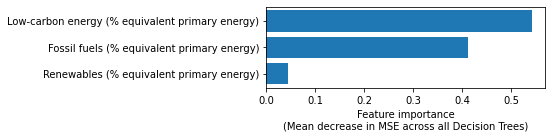

In [39]:
# Plot importance features
plot_feat_import(x_feat_list, rand_forest_regressor.feature_importances_, limit=10)

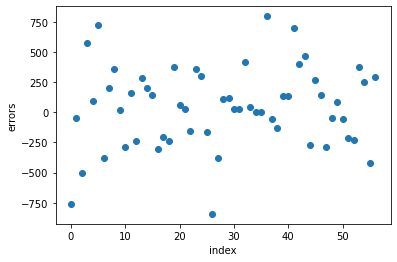

In [40]:
# check independence
errors = y - y_pred
plt.scatter(x = range(len(y)), y = errors)
plt.xlabel('index')
plt.ylabel('errors');

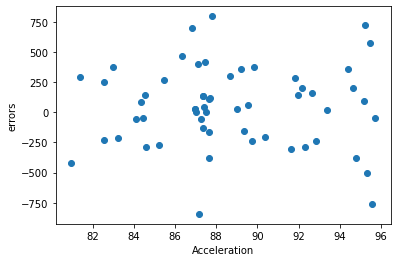

In [41]:
# check constant variance
plt.scatter(x = x[:,0], y = errors)
plt.xlabel('Acceleration')
plt.ylabel('errors');

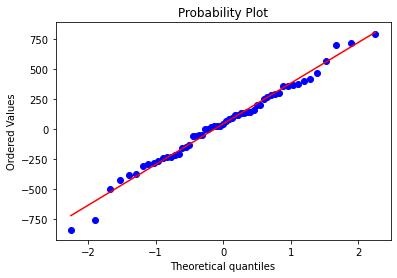

In [42]:
# check normality
stats.probplot(errors, dist="norm", plot=py)
py.show()

### Results

Based on our multiple regression machine learning algorithm, you can observe from the importance features bar graph that low-carbon sources and fossil fuels represent the most important features that impact USA's energy consumption.

Also, based on the three assumptions of independence, constant variance, and normailty, all three assumptions seem to be somewhat well fit, though, there is some slight pattern in independence and constance variance, and the data points seem to be slightly father off the porbability plot than the linear regression model. This suggest that there still is another model that can interpret these results better.

### K-Means Clustering:
For our K-Means clustering, we wanted to see the relationship between energy consumption statistics of a country and its hierarchical standing in the World-systems theory. There are three types of countries defined by the World-systems theory:
 - Core Countries: Countries that are centered around high-skilled labor and capital-intensive production. Relies on lower standing countries for raw materials and low-skilled labor.
 - Periphery Countries: Countries that have low economic wealth and lack in technology, education, health, etc,. Supplies core and semi-periphery countries with hard, unskilled labor and raw materials.
 - Semi-periphery Countries: Countries that have both the qualities of core countries and periphery countries.

Though there are many different factors in determining a country's class, we wanted to see if energy consumption had a large influence. Our initial standings for each country were from the "American Sociological Review" (Dunn, Kawana, Brewer (2000)). By implementing K-Means clustering, we will be able to determine if these attributes will heavily affect characterizing a country's stage. 

We believe that core countries will have more energy consumption per person than that of semi-periphery or periphery countries. Furthermore, renewable resources for core countries will be higher than others due to their technological superiority. To test this hypothesis, we'll use K-Means clustering to see if these features truly determine a country's position in the global hierarchy.

In [62]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from copy import copy
from collections import Counter
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [44]:
def clean_df_change(clean_df, year1, year2):
    
    ''' returns a new dataframe with the two inputted years and their absolute difference
    
    Args:
        clean_df (DataFrame): a dataframe that has already been cleaned using above methods
        year1 (int): our base year
        year2 (int): our final year
    
    Returns:
        df_comp (DataFrame): a dataframe with year1, year2, and their absolute change
    '''
    
    ## Create new column with difference between year1 and year2.
    diff = clean_df[year2] - clean_df[year1]
    
    ## Create new array based on newly created dictionary using year1 and year2.
    comp_arr = {year1: clean_df[year1].tolist(),
                year2: clean_df[year2].tolist()}
    
    ## Create new dataframe and add 'Absolute Change' column.
    df_comp = pd.DataFrame(comp_arr, index = countries_tup)
    df_comp['Absolute Change'] = diff
    
    ## Return new dataframe.
    return df_comp

In [45]:
## Extract only the entities and their attributes in the year 2000.
def get_clean_df_2000(df):
    
    ''' extracts the dataframe from the year 2000.
    
    Args:
        df (DataFrame): the unclean dataframe holding all the years.
    
    Result:
        df (DataFrame): the revised dataframe with only the year 2000.
    '''
    
    ## Locate when the year is 2000.
    df_2000 = df.loc[df['Year'] == 2000]
    
    ## Drop 'Code' and 'Year' in the dataframe.
    df_2000.drop(['Code'], axis = 1, inplace = True)
    df_2000.drop(['Year'], axis = 1, inplace = True)
    
    ## Return the new dataframe with 'Entity' as its index.
    return df_2000.set_index('Entity')

## Drop all countries ending with '(BP)'.
def drop_BP_df(df):
    
    ''' remove all countries that ends in '(BP)'.
    
    Args:
        df (DataFrame): the unclean dataframe that has countries with '(BP)'.
    
    Returns:
        df (DataFrame): the same dataframe without the countries with '(BP)'.
    '''
    
    entities = list(df.index)
    list_temp = []
    for entity in entities:
        if "(BP)" in entity:
            list_temp.append(entity)
    for BP in list_temp:
        df.drop(BP, inplace = True)
    return df

In [46]:
## Create clean dataframe for 'per-capita-energy-use.csv' using functions above.
df_energy_per_capita = pd.read_csv('per-capita-energy-use.csv')
df_energy_per_capita_2000 = get_clean_df_2000(df_energy_per_capita)
df_energy_per_capita_2000 = drop_BP_df(df_energy_per_capita_2000)

## Create clean dataframe for 'electricity-generation.csv' using functions above.
df_elec_gen = pd.read_csv('electricity-generation.csv')
df_elec_gen_2000 = get_clean_df_2000(df_elec_gen)
df_elec_gen_2000 = drop_BP_df(df_elec_gen_2000)

## Create clean dataframe for 'primary-energy-fossil-nuclear-renewables.csv' using functions above.
df_energy_stat = pd.read_csv('primary-energy-fossil-nuclear-renewables.csv')
df_energy_stat_2000 = get_clean_df_2000(df_energy_stat)
df_energy_stat_2000 = drop_BP_df(df_energy_stat_2000)

In [47]:
## List of all the core countries in 2000 according to "American Sociological Review".
core_countries = ['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 
                  'Ireland', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Spain', 
                  'Sweden', 'Switzerland', 'United Kingdom', 'United States']

## List of all the semi-periphery countries in 2000 according to "American Sociological Review".
semi_periph = ['Argentina', 'Brazil', 'China', 'Hong Kong', 'India', 'Indonesia', 'Iran',
               'Israel', 'Mexico', 'Singapore', 'South Korea', 'South Africa', 'Taiwan']

## The rest of the countries are considered to be periphery. However, due to their immense number, 
## we purposely didn't create a separate list.

## An empty list that will contain all the stages for each country.
stage_list = []

## Determine whether a country is a core, semi-periphery, or periphery country and 
## append to 'stage_list'.
for country in countries:
    if country in core_countries:
        stage_list.append('Core')
    elif country in semi_periph:
        stage_list.append('Semi-periphery')
    else:
        stage_list.append('Periphery')

In [48]:
## List all the countries in df_energy_stat_2000 (this dataframe had the least amount of countries).
## Create a tuple of countries for later dataframe creation.
countries = list(df_energy_stat_2000.index)
countries_tup = tuple(countries)

## Assign the columns for the final dataframe.
cols = ('Primary energy consumption per capita (kWh/person)', 'Electricity generation (TWh)',
       'Nuclear (% direct primary energy)', 'Renewables (% direct primary energy)',
        'Fossil fuels (% direct primary energy)')

In [49]:
## Combine multiple dataframes' attributes into one single dataframe.
def combine_energy_df(df_main, df1, df2, col, index):
    
    ''' given dataframes, column names, and index, return a new dataframe containing
        all the attributes of the inputted dataframes.
    
    Args:
        df_main (DataFrame): the main dataframe in which the index will be set as.
        df1 (DataFrame): a dataframe where it's attributes will be extracted and combined with df_main.
        df2 (DataFrame): another dataframe where it's attributes will be extracted and combined with df_main.
        col (Tuple): a tuple containing all the names for the columns of the new combined dataframe.
        index (Tuple): a tuple for all the row names for the new combined dataframe.
    
    Returns:
        df_final (DataFrame): the combined dataframe containing all the attributes of the inputted 
                            dataframes.
    '''
    
    ## Create an empty dataframe called 'df_final'.
    df_final = pd.DataFrame(columns = col, index = index)
    
    ## For every country in the list of 'countries', assign its attribute from
    ## each dataframe.
    for country in countries:
        att_1 = list(df1.loc[country, :])
        att_2 = list(df2.loc[country, :])
        att_3 = list(df_main.loc[country, :])
        list_final = att_1 + att_2 + att_3
        df_final.loc[country, :] = list_final
    
    ## Return the final combined dataframe.
    return df_final

In [50]:
## Implement function 'combine_energy_df' to create df_final.
df_final = combine_energy_df(df_energy_stat_2000, df_energy_per_capita_2000, df_elec_gen_2000, cols, countries_tup)
df_final

Primary energy consumption per capita (kWh/person)  \
Africa                                                               3955.723633   
Algeria                                                              9662.500977   
Argentina                                                           18950.958984   
Asia                                                                 9851.110352   
Australia                                                           68728.851562   
...                                                                          ...   
Upper-middle-income countries                                       13325.481445   
Uzbekistan                                                          24204.648438   
Venezuela                                                           33825.332031   
Vietnam                                                              2679.862793   
World                                                               17944.181641   

                              Electricity generation (TWh)  \
Africa                                           440.18353   
Algeria                                             25.412   
Argentina                                         88.97796   
Asia                                              4800.755   
Australia                                          216.829   
...                                                    ...   
Upper-middle-income countries                    3686.4648   
Uzbekistan                                          46.864   
Venezuela                                           85.211   
Vietnam                                             26.561   
World                                            15564.162   

                              Nuclear (% direct primary energy)  \
Africa                                                 0.429138   
Algeria                                                     0.0   
Argentina                                               0.97962   
Asia                                                   1.445667   
Australia                                                   0.0   
...                                                         ...   
Upper-middle-income countries                          0.750178   
Uzbekistan                                                  NaN   
Venezuela                                                   0.0   
Vietnam                                                     0.0   
World                                                  2.584181   

                              Renewables (% direct primary energy)  \
Africa                                                    2.563357   
Algeria                                                    0.01801   
Argentina                                                 4.598529   
Asia                                                      1.756626   
Australia                                                 1.380052   
...                                                            ...   
Upper-middle-income countries                             3.313075   
Uzbekistan                                                0.999757   
Venezuela                                                 9.045086   
Vietnam                                                   7.836905   
World                                                     2.993201   

                              Fossil fuels (% direct primary energy)  
Africa                                                       97.0075  
Algeria                                                    99.981995  
Argentina                                                  94.421844  
Asia                                                       96.797707  
Australia                                                  98.619949  
...                                                              ...  
Upper-middle-income countries                              95.936752  
Uzbekistan                                                 99.

In [63]:
## Add a new column describing the stage of the country using 'stage_list'.
df_final['Stage (Core, Semi-Periphery, Periphery)'] = stage_list

## Drop all rows containing NaN (this is because K-NN Clustering only works with numerical values).
df_final = df_final.dropna()
df_final

ValueError: Length of values (114) does not match length of index (89)

In [64]:
x_feat_list = list(df_final.columns[0:4])

In [65]:
## Create a copy of df_wine.
df_final_scaled = copy(df_final)

## Scale the x_feat_list by using scale normalization technique.
for feat in x_feat_list:
    df_final_scaled[feat] = df_final_scaled[feat] / df_final_scaled[feat].std()

## Extract the values of x_feat_list in the new scaled dataframe.
x = df_final_scaled.loc[:, x_feat_list].values

## Fit K-Means algorithm for choice of k from 2 to 15 clusters.
mean_d_dict = dict()
for n_clusters in range(2, 16):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    y = kmeans.predict(x)  
    
    mean_d = -kmeans.score(x)
    mean_d_dict[n_clusters] = mean_d

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Text(0, 0.5, 'mean dist^2 to centroid')

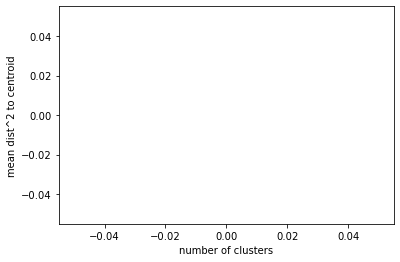

In [66]:
## Plot the number of clusters against the mean distance.
plt.plot(mean_d_dict.keys(), mean_d_dict.values())
plt.xlabel('number of clusters')
plt.ylabel('mean dist^2 to centroid')

In [67]:
## Use 5 clusters as elbow is at around 5.
kmeans = KMeans(n_clusters = 5)
kmeans.fit(x)
y = kmeans.predict(x)
df_final['cluster'] = y
df_final.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [68]:
bool_cluster0 = df_final['cluster'] == 0
bool_cluster1 = df_final['cluster'] == 1
bool_cluster2 = df_final['cluster'] == 2
bool_cluster3 = df_final['cluster'] == 3
bool_cluster4 = df_final['cluster'] == 4

KeyError: 'cluster'

In [69]:
clust0 = df_final.loc[bool_cluster0,:]
Counter(clust0['Stage (Core, Semi-Periphery, Periphery)'])

NameError: name 'bool_cluster0' is not defined

In [70]:
clust1 = df_final.loc[bool_cluster1,:]
Counter(clust1['Stage (Core, Semi-Periphery, Periphery)'])

NameError: name 'bool_cluster1' is not defined

In [71]:
clust2 = df_final.loc[bool_cluster2,:]
Counter(clust2['Stage (Core, Semi-Periphery, Periphery)'])

NameError: name 'bool_cluster2' is not defined

In [72]:
clust3 = df_final.loc[bool_cluster3,:]
Counter(clust3['Stage (Core, Semi-Periphery, Periphery)'])

NameError: name 'bool_cluster3' is not defined

In [73]:
clust4 = df_final.loc[bool_cluster4,:]
Counter(clust4['Stage (Core, Semi-Periphery, Periphery)'])

NameError: name 'bool_cluster4' is not defined

### Result:
After implementing K-Means Clustering to our dataframe to see if we could find any relation between stage of Country and their energy consumption statistics, we find that there is minimal correlation. Though there are some clusters where one stage is dominant, many of them are even and balanced. Therefore, though energy consumption does have some effect in determining a country's class, it is not the main determining factor.

## Discussion

Based on the outputs we were able to produce, we can easily determine that there is potential produce an efficient and correct predicitive model for the trends in energy production within the United States, however both linear and multiple regression prove inadaquete when applied to the given data. The data proves to be too random and non-polynomial which provided errors and insufficient results to the linear and multiple regression predicitve models. With an R squared value of 64% when linear regression was applied we assumed a negative adaquate relationship for the United States energy consumption over time, however when the data was ploted there were obvious patterns outside of a linear fit that drew us to a secondary predicitve model of multiple regression. The R squared value fot multiple regression was much higher at 85%, yet when checking for constant variance and normality the plots proved to show patterns outside of the necessary boundaries showing an insuffienient correlation between the data and a polynomial distribution. Even with incinclusive data we have determined that the usage of low carbon energy and fossil fuels account for the largest feature importance when determining the slope and behavior of the plot over time. 

A secondary aspect of the data we analyzed was the relatinship between energy consumption and economic success within a country. We did this through a k-means clustering algorithm under the assumption that more ecnomically powerful countries would utilizize lager sums of energy on a global scale. However, after running k means clustering we conculded that the consumption of energy has minimal correlation to the economic status of a country. This conclusion was made due to the 3 clusters containing core, semi-periphery, and periphery countries in an almost random like manner showing an inconclusive relationship. This allows us to generalize this information proving the economy of a country had minimal effect on energy consumption, therefore the transition to clean energy resides on the shoulders of every classification of country.

To improve predictive algorithms we recommend searching outside the realm of linear and multiple regression to more accurately predict the energy trends of the United States. Another improvement that could be implemented is the type of data that is analyzed. It is possible that there isn't a definate relationship that can be accuratley predicted from the data sources we chose, therefore data outside the parameters of our project should also be accounted for. However, our k means clustering method proved successful in contradicting our hypothesis and determing the lack of relationship between energy conusmption and economy

### Takeaway

Overall we feel we have provided progression and comprehension to the energy trends on both a global and national scale determining the important factors in a predictive model for the United States while also learning there are additional solutions that need to be considered. We have also mades strides in the understanding of energy relationships on an international scale that can be used for further research. 